# EDA

Perform exploratory data analysis and visualization for:

<br>

*American Community Survey - Selected Economic Characteristics (5 Year Estimates)*

**acs_5yr_est_selected_economic_characteristics_2010-2022.csv**

The American Community Survey (ACS) is an ongoing survey conducted by the US Census
Bureau that provides vital information on a yearly basis about various social and economic
characteristics across demographics.
~98K rows & 8 columns. Size: 12.1 MB. Source: American Community Survey

<br>

*Energy Sector Stocks and Commodities (HLOC)*

**all_commodities.csv**

**all_stocks_and_etfs.csv**

**stock_descriptions.csv**


A collection of daily high/low/open/close prices for stocks in the energy sector and four
exchange-traded funds (ETF) that track major indices (S&P 500, Nasdaq, Dow Jones Industrial
Average), some general information about these companies, and daily prices for energy
commodities.
Stocks and ETFs ~145K rows & 7 columns. Size: 7.1 MB
Commodities ~27K rows & 5 columns. Size: 1.9 MB
Descriptions 29 rows & 6 columns. Size: 14 KB
Source: Alpha Vantage and Yahoo! Finance

<br>

*Recent and Historic Energy Statistics*

**Energy Data - Consumption.csv**

**Energy Data - Emissions.csv**

**Energy Data - Imports & Exports.csv**

**Energy Data - Production.csv**

**Energy Data - Stocks.csv**


Import/exports volume, production, stocks, consumption, and emissions from energy sources in
the United States.
Imports & Exports ~19.5K rows & 10 columns. Size: 2.3 MB
Production ~10.3K rows & 7 columns. Size: 826 KB
Stocks ~17.5K rows & 11 columns. Size: 2.3 MB
Consumption ~57.6K rows & 12 columns. Size: 8.7 MB
Emissions ~48.3K rows & 10 columns. Size: 7.3 MB
Source: U.S. Energy Information Administration

<br>

*Monthly Transportation Statistics*

**monthly_transportation_statistics.csv**


The latest monthly and quarterly data from across the government and the transportation
industry.
289 rows & 137 columns. Size: 309 KB. Source: U.S. Dept of Transportation - Bureau of
Transportation Statistics













In [8]:
# import libraries for eda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os
import sys
import statsmodels.api as sm

from time import strptime
from datetime import datetime

data_folderpath = r"data\!Spring_Invitational_2024_data\Datathon_Data" 

## American Community Survey - Selected Economic Characteristics (5 Year Estimates)

** **acs_5yr_est_selected_economic_characteristics_2010-2022.csv**

In [9]:
def str_to_numeric(s, check_numeric=True, comma_is_dot=False):
    if not isinstance(s, str):
        return s
    s_clean = s.replace("%", "").replace("±", "").replace("(", "").replace(")", "").replace("R", "").replace("P", "")
    
    comma_replace = "." if comma_is_dot else ""
    s_clean = s_clean.replace(",", comma_replace)
    
    if s_clean.isnumeric() or not check_numeric:
        return float(s_clean)
    return s_clean

In [10]:
def preprocess_econ_data(data):
    for col in ["Percent", "Percent Margin of Error"]:
        data[col] = data[col].apply(str_to_numeric)
    return data.sort_values("Year")

In [11]:
# import data
econ_data_path = data_folderpath + r"\acs_5yr_est_selected_economic_characteristics_2010-2022.csv"

print(econ_data_path)

econ_data = pd.read_csv(econ_data_path)
econ_data = preprocess_econ_data(econ_data)

#Print type of each col
print(econ_data.dtypes)

for col in econ_data.columns:
    print(col," - " ,type(econ_data[col][0]))

econ_data.head()

data\!Spring_Invitational_2024_data\Datathon_Data\acs_5yr_est_selected_economic_characteristics_2010-2022.csv
Label (Grouping)           object
Category                   object
State                      object
Estimate                   object
Margin of Error            object
Percent                    object
Percent Margin of Error    object
Year                        int64
dtype: object
Label (Grouping)  -  <class 'str'>
Category  -  <class 'str'>
State  -  <class 'str'>
Estimate  -  <class 'float'>
Margin of Error  -  <class 'float'>
Percent  -  <class 'float'>
Percent Margin of Error  -  <class 'float'>
Year  -  <class 'numpy.int64'>


,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
0,EMPLOYMENT STATUS,Header,Alabama,NaN,NaN,NaN,NaN,2010
5034,With public coverage,HEALTH INSURANCE COVERAGE,North Dakota,(X),(X),X,X,2010
5033,With private health insurance,HEALTH INSURANCE COVERAGE,North Dakota,(X),(X),X,X,2010
5032,With health insurance coverage,HEALTH INSURANCE COVERAGE,North Dakota,(X),(X),X,X,2010
5031,Civilian noninstitutionalized population,HEALTH INSURANCE COVERAGE,North Dakota,(X),(X),X,X,2010


In [12]:
econ_data["Label (Grouping)"].unique()

array(['EMPLOYMENT STATUS',
       '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With public coverage',
       '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With private health insurance',
       '\xa0\xa0\xa0\xa0With health insurance coverage',
       '\xa0\xa0\xa0\xa0Civilian noninstitutionalized population',
       'HEALTH INSURANCE COVERAGE',
       '\xa0\xa0\xa0\xa0Median earnings for female full-time, year-round workers (dollars)',
       '\xa0\xa0\xa0\xa0Median earnings for male full-time, year-round workers (dollars)',
       '\xa0\xa0\xa0\xa0Median earnings for workers (dollars)',
       '\xa0\xa0\xa0\xa0Mean nonfamily income (dollars)',
       '\xa0\xa0\xa0\xa0Median nonfamily income (dollars)',
       '\xa0\xa0\xa0\xa0Nonfamily households',
       '\xa0\xa0\xa0\xa0Per capita income (dollars)',
       '\xa0\xa0\xa0\xa0Mean family income (dollars)',
       '\xa0\xa0\xa0\xa0Median family income (dollars)',
       '$200,000 or more', '$150,000 to $199,999', '$100,000 to $149,999',
       '$75,000 to $99,

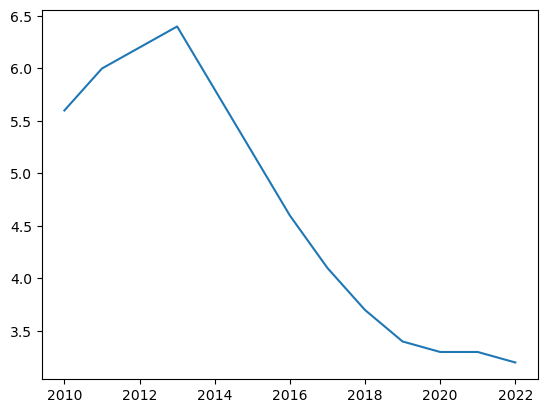

In [13]:
unemployment_rate = econ_data[econ_data["Label (Grouping)"].str.contains("Unemployed") & (econ_data["State"] == "Ohio") & econ_data["Category"].str.contains("EMPLOYMENT STATUS") & ~econ_data["Label (Grouping)"].str.contains("Percent Unemployed")]

plt.plot(unemployment_rate["Year"], unemployment_rate["Percent"].astype(float))

In [14]:
econ_data[econ_data["Label (Grouping)"].str.contains("Unemployment Rate") & (econ_data["State"] == "Ohio")]

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
50324,Unemployment Rate,EMPLOYMENT STATUS,Ohio,(X),(X),8.2,0.1,2015
35244,Unemployment Rate,EMPLOYMENT STATUS,Ohio,(X),(X),7.2,0.1,2016
42784,Unemployment Rate,EMPLOYMENT STATUS,Ohio,(X),(X),6.5,0.1,2017
72944,Unemployment Rate,EMPLOYMENT STATUS,Ohio,(X),(X),5.8,0.1,2018
65404,Unemployment Rate,EMPLOYMENT STATUS,Ohio,(X),(X),5.3,0.1,2019
88024,Unemployment Rate,EMPLOYMENT STATUS,Ohio,(X),(X),5.3,0.1,2020
95564,Unemployment Rate,EMPLOYMENT STATUS,Ohio,(X),(X),5.3,0.1,2021
80484,Unemployment Rate,EMPLOYMENT STATUS,Ohio,(X),(X),5.0,0.1,2022


In [15]:
top_oil_producers = ["Texas", "New Mexico", "Oklahoma", "Colorado", "North Dakota", "Alaska"] # https://www.investopedia.com/financial-edge/0511/top-6-oil-producing-states.aspx
natural_res_occupation = "Natural resources, construction, and maintenance occupations"
manufacturing_occupation = "Manufacturing"

natural_res = econ_data[(econ_data["Label (Grouping)"].str.contains(natural_res_occupation))]
manufacturing = econ_data[(econ_data["Label (Grouping)"].str.contains(manufacturing_occupation))]

natural_res["Percent"] = natural_res["Percent"].astype(float)
natural_res["Percent Margin of Error"] = natural_res["Percent Margin of Error"].astype(float)

C:\Users\botta\AppData\Local\Temp\ipykernel_15776\1982607248.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  natural_res["Percent"] = natural_res["Percent"].astype(float)
C:\Users\botta\AppData\Local\Temp\ipykernel_15776\1982607248.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  natural_res["Percent Margin of Error"] = natural_res["Percent Margin of Error"].astype(float)


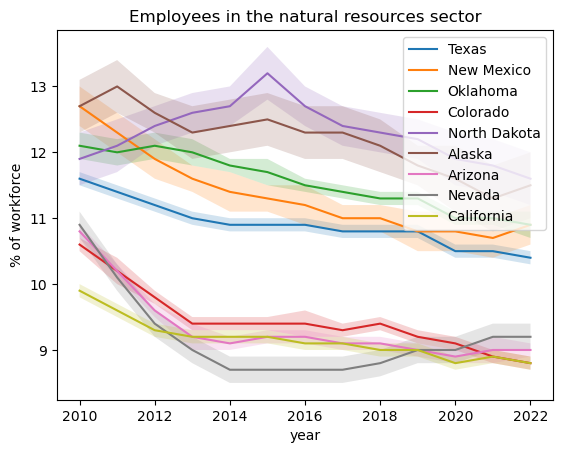

In [18]:
for state in top_oil_producers + ["Arizona", "Nevada", "California"]:
    state_natural_res = natural_res[natural_res["State"] == state]
    
    percent = state_natural_res["Percent"]
    moe = state_natural_res["Percent Margin of Error"]
    year = state_natural_res["Year"]
    
    plt.plot(year, percent, label=state)
    plt.fill_between(year, percent - moe, percent + moe, alpha=0.2)

plt.title("Employees in the natural resources sector")
plt.ylabel("% of workforce")
plt.xlabel("year")
plt.legend()
plt.show()

## Energy Sector Stocks and Commodities (HLOC)


### **all_commodities.csv**

In [16]:
# import data

commodities_data_path = data_folderpath + r"/all_commodities.csv"

print(commodities_data_path)

commodities_data = pd.read_csv(commodities_data_path).sort_values("Date_Time")

data\!Spring_Invitational_2024_data\Datathon_Data/all_commodities.csv


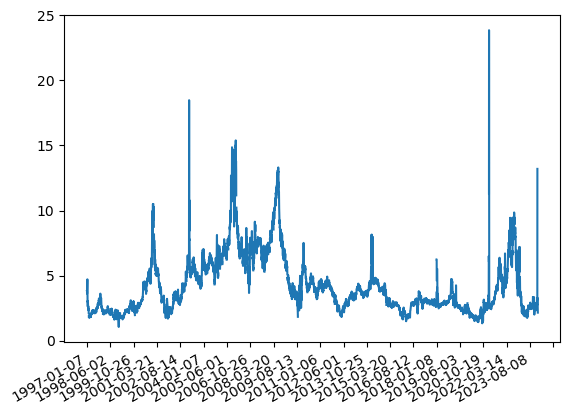

In [14]:
natural_gas = commodities_data[commodities_data["Commodity_Simple"] == "NATURAL_GAS"]

plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.plot(natural_gas["Date_Time"], natural_gas["Value"])
plt.gcf().autofmt_xdate()
plt.show()

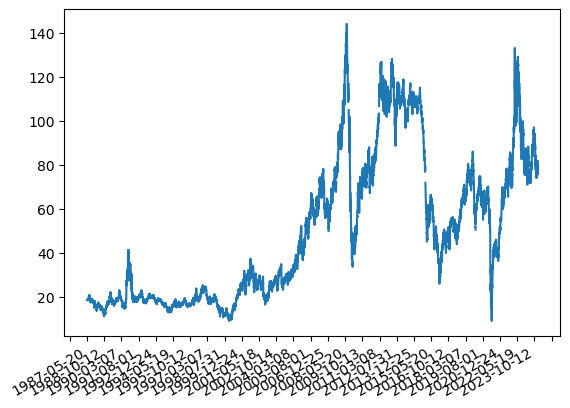

In [17]:
oil_price = commodities_data[commodities_data["Commodity_Simple"] == "BRENT"]

plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.plot(oil_price["Date_Time"], oil_price["Value"])
plt.gcf().autofmt_xdate()
plt.show()

In [242]:
oil_price["Quarter"] = ((oil_price["Month"]-1) // 4 + 1).astype(int)
oil_price["Quarter_Date_Time"] = oil_price.apply(lambda row: datetime(year=row["Year"], month=row["Quarter"]*3 - 2, day=1), axis=1)
oil_price["log_price"] = np.log(oil_price["Value"])
oil_price["squared_log_diff"] = (oil_price["log_price"].diff())**2
realized_volatility = oil_price.groupby(["Quarter_Date_Time"]).agg({"squared_log_diff": "sum"}).reset_index()

C:\Users\botta\AppData\Local\Temp\ipykernel_5460\1762154709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil_price["Quarter"] = ((oil_price["Month"]-1) // 4 + 1).astype(int)
C:\Users\botta\AppData\Local\Temp\ipykernel_5460\1762154709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil_price["Quarter_Date_Time"] = oil_price.apply(lambda row: datetime(year=row["Year"], month=row["Quarter"]*3 - 2, day=1), axis=1)
C:\Users\botta\AppData\Local\Temp\ipykernel_5460\1762154709.py:3: SettingWithCopyWarnin

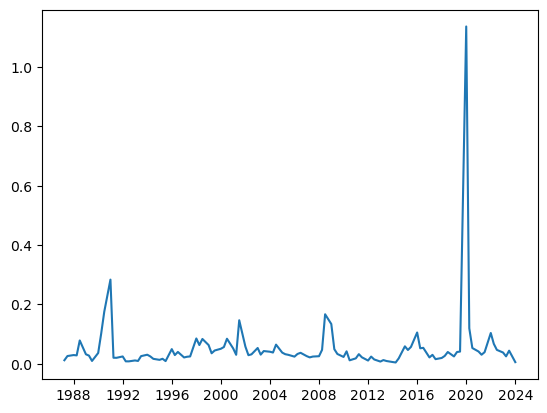

In [243]:
plt.plot(realized_volatility["Quarter_Date_Time"], realized_volatility["squared_log_diff"])

In [244]:
oil_price

,Date_Time,Value,Commodity,Commodity_Simple,Unit,Year,Month,Quarter,log_price,lag_log_price,squared_log_diff,Quarter_Date_Time
26557,1987-05-20,18.63,Brent Crude Oil,BRENT,Dollars per Barrel,1987,5,2,2.924773,NaN,NaN,1987-04-01
26556,1987-05-21,18.45,Brent Crude Oil,BRENT,Dollars per Barrel,1987,5,2,2.915064,2.924773,0.000094,1987-04-01
26555,1987-05-22,18.55,Brent Crude Oil,BRENT,Dollars per Barrel,1987,5,2,2.920470,2.915064,0.000029,1987-04-01
26554,1987-05-25,18.60,Brent Crude Oil,BRENT,Dollars per Barrel,1987,5,2,2.923162,2.920470,0.000007,1987-04-01
26553,1987-05-26,18.63,Brent Crude Oil,BRENT,Dollars per Barrel,1987,5,2,2.924773,2.923162,0.000003,1987-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...
16993,2024-01-16,80.15,Brent Crude Oil,BRENT,Dollars per Barrel,2024,1,1,4.383900,4.379022,0.000024,2024-01-01
16992,2024-01-17,78.88,Brent Crude Oil,BRENT,Dollars per Barrel,2024,1,1,4.367928,4.383900,0.000255,2024-01-01
16991,2024-01-18,81.04,Brent Crude Oil,BRENT,Dollars per Barrel,2024,1,1,4.394943,4.367928,0.000730,2024-01-01
16990,2024-01-19,80.71,Brent Crude Oil,BRENT,Dollars per Barrel,2024,1,1,4.390862,4.394943,0.000017,2024-01-01


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

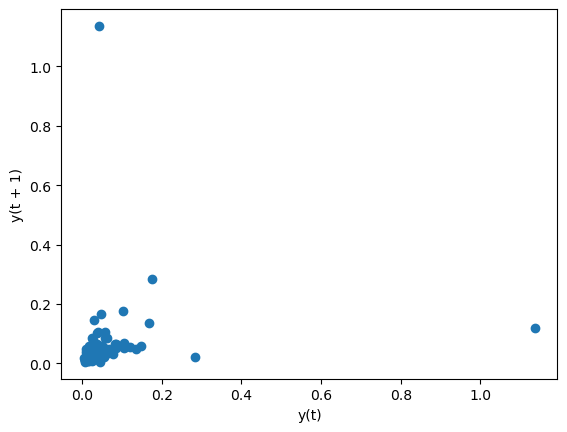

In [245]:
from pandas.plotting import lag_plot

lag_plot(realized_volatility["squared_log_diff"])

### **all_stocks_and_etfs.csv**

In [14]:
# import data
stocks_path = data_folderpath + r"/all_stocks_and_etfs.csv"

print(stocks_path)

stocks = pd.read_csv(stocks_path).sort_values("Date-Time")

data\!Spring_Invitational_2024_data\Datathon_Data/all_stocks_and_etfs.csv


In [15]:
stocks.head()

,Date-Time,Open,High,Low,Close,Volume,Ticker_Symbol
144557,1999-11-01,136.500,137.000,135.5625,135.5625,4006500,SPY
34973,1999-11-01,8.813,8.875,8.7500,8.7500,20700,BPT
106080,1999-11-01,20.750,21.060,20.5600,21.0000,209000,EOG
117765,1999-11-01,61.250,62.560,59.7500,62.5000,2854800,SLB
6096,1999-11-01,38.250,38.810,36.7500,38.7500,3166300,HAL


In [16]:
stocks["Ticker_Symbol"].unique()

array(['SPY', 'BPT', 'EOG', 'SLB', 'HAL', 'VLO', 'XOM', 'EXC', 'CVX',
       'BP', 'HES', 'OXY', 'EPD', 'E', 'COP', 'NOV', 'DVN', 'DIA', 'WMB',
       'CEO', 'ONEQ', 'VOO', 'KMI', 'MPC', 'PSX', 'FANG', 'BKR', 'CHK'],
      dtype=object)

In [17]:
sp500 = stocks[stocks["Ticker_Symbol"] == "SPY"]

In [20]:
stocks[stocks["Ticker_Symbol"] == "SPY"]

,Date-Time,Open,High,Low,Close,Volume,Ticker_Symbol
144557,1999-11-01,136.5000,137.0000,135.5625,135.5625,4006500,SPY
144556,1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900,SPY
144555,1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300,SPY
144554,1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500,SPY
144553,1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500,SPY
...,...,...,...,...,...,...,...
138460,2024-01-26,487.5900,489.1200,486.5400,487.4100,76641609,SPY
138459,2024-01-29,487.7300,491.4150,487.1700,491.2700,61322751,SPY
138458,2024-01-30,490.5600,491.6200,490.1100,490.8900,58618386,SPY
138457,2024-01-31,488.6200,489.0813,482.8600,482.8800,126011062,SPY


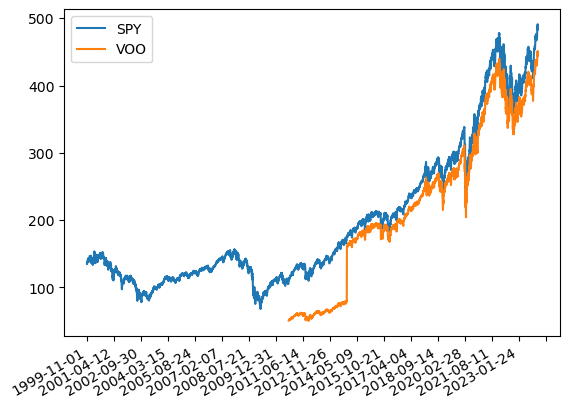

In [23]:
spy = stocks[stocks["Ticker_Symbol"] == "SPY"]
voo = stocks[stocks["Ticker_Symbol"] == "VOO"]

plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.plot(spy["Date-Time"], spy["Close"], label="SPY")
plt.plot(voo["Date-Time"], voo["Close"], label="VOO")

plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

In [367]:
sp500["Year"] = sp500["Date-Time"].apply(lambda s: int(s[:4]))
sp500["Month"] = sp500["Date-Time"].apply(lambda s: int(s[5:7]))
sp500["Quarter"] = ((sp500["Month"]-1) // 4 + 1).astype(int)
sp500["Quarter_Date_Time"] = sp500.apply(lambda row: datetime(year=row["Year"], month=row["Quarter"]*3 - 2, day=1), axis=1)
sp500["log_price"] = np.log(sp500["Close"])
sp500["log_diff_squared"] = ((sp500["log_price"].diff())**2)
sp500_rv = sp500.groupby(["Quarter_Date_Time"]).agg({"log_diff_squared": "sum"}).reset_index()
sp500_rv["log_diff_squared"] = sp500_rv["log_diff_squared"].shift(1)
#sp500_rv["log_diff_squared_2"] = sp500_rv["log_diff_squared"].shift(2)
sp500_rv = sp500_rv.dropna()

C:\Users\botta\AppData\Local\Temp\ipykernel_5460\2862717660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500["Year"] = sp500["Date-Time"].apply(lambda s: int(s[:4]))
C:\Users\botta\AppData\Local\Temp\ipykernel_5460\2862717660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500["Month"] = sp500["Date-Time"].apply(lambda s: int(s[5:7]))
C:\Users\botta\AppData\Local\Temp\ipykernel_5460\2862717660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [368]:
sp500

,Date-Time,Open,High,Low,Close,Volume,Ticker_Symbol,Year,Month,Quarter,Quarter_Date_Time,log_price,log_diff_squared
138455,2010-09-09,51.25,51.2500,50.5700,50.660,53000,VOO,2010,9,3,2010-07-01,3.925137,NaN
138454,2010-09-10,50.84,50.9300,50.6480,50.890,17200,VOO,2010,9,3,2010-07-01,3.929666,2.051905e-05
138453,2010-09-13,51.48,51.5700,51.2500,51.530,67400,VOO,2010,9,3,2010-07-01,3.942164,1.561930e-04
138452,2010-09-14,51.42,51.7400,51.1900,51.519,118800,VOO,2010,9,3,2010-07-01,3.941951,4.557827e-08
138451,2010-09-15,51.31,51.6900,51.2000,51.650,18400,VOO,2010,9,3,2010-07-01,3.944490,6.449182e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135088,2024-01-26,448.10,449.5100,447.1600,448.230,6404023,VOO,2024,1,1,2024-01-01,6.105306,3.626303e-07
135087,2024-01-29,448.23,451.6098,447.7112,451.490,4543252,VOO,2024,1,1,2024-01-01,6.112553,5.251511e-05
135086,2024-01-30,450.84,451.8100,450.4400,451.170,3409953,VOO,2024,1,1,2024-01-01,6.111844,5.027031e-07
135085,2024-01-31,449.04,449.4650,443.7500,443.820,7108043,VOO,2024,1,1,2024-01-01,6.095419,2.697850e-04


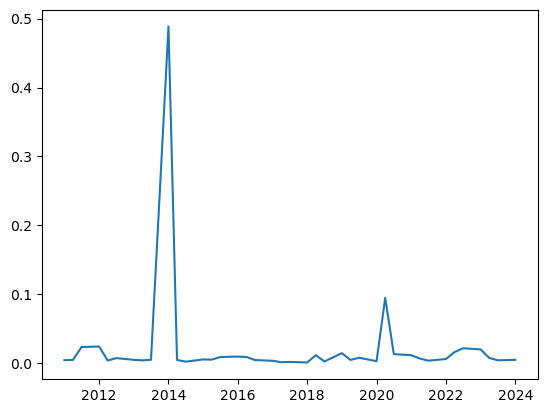

In [369]:
plt.plot(sp500_rv["Quarter_Date_Time"], sp500_rv["log_diff_squared"])

In [346]:
adfuller(sp500_rv["log_diff_squared"])

(-6.371884495427837,
 2.3341385629279475e-08,
 0,
 39,
 {'1%': -3.610399601308181,
  '5%': -2.939108945868946,
  '10%': -2.6080629651545038},
 -150.8723650427888)

### **stock_descriptions.csv**


In [5]:
# import data

stock_descriptions_path = data_folderpath + r"\stock_descriptions.csv"
stock_descriptions = pd.read_csv(stock_descriptions_path)

stock_descriptions.head()

,Symbol,AssetType,Name,Description,Sector,Industry
0,BKR,Common Stock,Baker Hughes Company,Baker Hughes Company provides a portfolio of t...,ENERGY & TRANSPORTATION,OIL & GAS EQUIPMENT & SERVICES
1,BP,Common Stock,BP PLC ADR,BP plc participates in the energy business glo...,ENERGY & TRANSPORTATION,PETROLEUM REFINING
2,BPT,Common Stock,BP Prudhoe Bay Royalty Trust,BP Prudhoe Bay Royalty Trust is a grantor trus...,TECHNOLOGY,GENERAL
3,CEO,Common Stock,CNOOC Limited,CNOOC Limited operates exploration and product...,ENERGY & TRANSPORTATION,OIL & GAS EQUIPMENT & SERVICES
4,CHK,Common Stock,Chesapeake Energy Corporation,"Chesapeake Energy Corporation, an independent ...",ENERGY & TRANSPORTATION,OIL & GAS EQUIPMENT & SERVICES


## Recent and Historic Energy Statistics



### **Energy Data - Consumption.csv**



In [14]:
# import data

energy_consumption_path = data_folderpath + r"\Energy Data - Consumption.csv"
energy_consumption = pd.read_csv(energy_consumption_path)

energy_consumption.head()

,EIA_ID,YYYYMM,Date,Value,Column_Order,Description,Unit,Energy Type,Energy Category,Energy Class,Sector
0,DFRCPUS,197301,1/1/1973,1706.943,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Distillate Fuel Oil,Petroleum,Residential
1,DFRCPUS,197302,2/1/1973,1614.436,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Distillate Fuel Oil,Petroleum,Residential
2,DFRCPUS,197303,3/1/1973,1140.521,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Distillate Fuel Oil,Petroleum,Residential
3,DFRCPUS,197304,4/1/1973,824.604,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Distillate Fuel Oil,Petroleum,Residential
4,DFRCPUS,197305,5/1/1973,676.745,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Distillate Fuel Oil,Petroleum,Residential


In [15]:
energy_consumption["Description"].unique()

array(['Distillate Fuel Oil Consumed by the Residential Sector',
       'Propane Consumed by the Residential Sector',
       'Kerosene Consumed by the Residential Sector',
       'Total Petroleum Consumed by the Residential Sector',
       'Distillate Fuel Oil Consumed by the Commercial Sector',
       'Propane Consumed by the Commercial Sector',
       'Kerosene Consumed by the Commercial Sector',
       'Motor Gasoline Consumed by the Commercial Sector',
       'Petroleum Coke Consumed by the Commercial Sector',
       'Residual Fuel Oil Consumed by the Commercial Sector',
       'Total Petroleum Consumed by the Commercial Sector',
       'Asphalt and Road Oil Consumed by the Industrial Sector',
       'Distillate Fuel Oil Consumed by the Industrial Sector',
       'Propane Consumed by the Industrial Sector',
       'Propylene Consumed by the Industrial Sector',
       'Propane/Propylene Consumed by the Industrial Sector',
       'Total Hydrocarbon Gas Liquids Consumed by the Industr

### **Energy Data - Emissions.csv**



In [16]:
# import data

energy_emissions_path = data_folderpath + r"\Energy Data - Emissions.csv"
energy_emissions = pd.read_csv(energy_emissions_path)

energy_emissions = energy_emissions[energy_emissions["Value"] != "Not Available"]

energy_emissions.head()

,MSN,YYYYMM,Date,Value,Column_Order,Description,Unit,Energy Type,Energy Class,Sector
0,CKTCEUS,197301,1/1/1973,109.552,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide,Coal,Coal,NaN
1,CKTCEUS,197302,2/1/1973,98.833,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide,Coal,Coal,NaN
2,CKTCEUS,197303,3/1/1973,98.483,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide,Coal,Coal,NaN
3,CKTCEUS,197304,4/1/1973,94.15,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide,Coal,Coal,NaN
4,CKTCEUS,197305,5/1/1973,95.424,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide,Coal,Coal,NaN


In [17]:
energy_emissions["Energy Type"].unique(), energy_emissions["Energy Class"].unique()

(array(['Coal', 'Natural Gas', 'Aviation Gasoline', 'Distillate Fuel Oil',
        'Hydrocarbon Gas Liquids (HGL)', 'Jet Fuel', 'Kerosene',
        'Lubricants', 'Motor Gasoline', 'Petroleum Coke',
        'Residual Fuel Oil', 'Other', 'Total', 'Electricity', 'Coal Coke',
        'Geothermal Energy', 'Non-Biomass Waste', 'Wood', 'Biomass Waste',
        'Fuel Ethanol', 'Biodiesel', 'Biomass'], dtype=object),
 array(['Coal', 'Natural Gas', 'Petroleum', 'Total', 'Electricity',
        'Geothermal Energy', 'Non-Biomass Waste', 'Biomass'], dtype=object))

In [18]:
energy_emissions["Value"] = energy_emissions["Value"].apply(lambda s: int(s.replace(".", "")))

agg_emissions = (
    energy_emissions[energy_emissions["Value"] != "Not Available"]
    .groupby(["YYYYMM", "Energy Class", "Unit", "Sector"])
    .agg("sum").reset_index()
    [["YYYYMM", "Energy Class", "Unit", "Sector", "Value"]]
)

C:\Users\nicho\AppData\Local\Temp\ipykernel_7196\4122644063.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg("sum").reset_index()


In [19]:
agg_emissions[agg_emissions["Energy Class"] == "Total"]["Sector"].unique()

array(['Commercial', 'Electric Power', 'Industrial', 'Residential',
       'Transportation'], dtype=object)

### **Energy Data - Imports & Exports.csv**


In [6]:
# import data
imports_exports_path = data_folderpath + r"/Energy Data - Imports & Exports.csv"

imports_export = pd.read_csv(imports_exports_path)

imports_export.head()

,EIA_ID,YYYYMM,Date,Value,Column_Order,Description,Country,Unit,OPEC,Import Export
0,PAIMPAG,197301,1/1/1973,180.065,1,Petroleum Imports From Algeria,Algeria,Thousand Barrels per Day,True,Import
1,PAIMPAG,197302,2/1/1973,173.679,1,Petroleum Imports From Algeria,Algeria,Thousand Barrels per Day,True,Import
2,PAIMPAG,197303,3/1/1973,141.323,1,Petroleum Imports From Algeria,Algeria,Thousand Barrels per Day,True,Import
3,PAIMPAG,197304,4/1/1973,108.867,1,Petroleum Imports From Algeria,Algeria,Thousand Barrels per Day,True,Import
4,PAIMPAG,197305,5/1/1973,180.581,1,Petroleum Imports From Algeria,Algeria,Thousand Barrels per Day,True,Import


In [24]:
# import data

energy_production_path = data_folderpath + r"\Energy Data - Production.csv"
energy_production = pd.read_csv(energy_production_path)

energy_production.head()

,EIA_ID,YYYYMM,Date,Value,Column_Order,Description,Unit
0,WDPRBUS,197301,1/1/1973,129.63,1,Wood Energy Production,Trillion Btu
1,WDPRBUS,197302,2/1/1973,117.194,1,Wood Energy Production,Trillion Btu
2,WDPRBUS,197303,3/1/1973,129.763,1,Wood Energy Production,Trillion Btu
3,WDPRBUS,197304,4/1/1973,125.462,1,Wood Energy Production,Trillion Btu
4,WDPRBUS,197305,5/1/1973,129.624,1,Wood Energy Production,Trillion Btu


In [34]:
crude_oil_production = energy_production[energy_production["Description"] == 'Crude Oil Production']
crude_oil_production["Value"] = crude_oil_production["Value"].apply(lambda s: str_to_numeric(s, check_numeric=False))

C:\Users\botta\AppData\Local\Temp\ipykernel_11592\355971982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crude_oil_production["Value"] = crude_oil_production["Value"].apply(lambda s: str_to_numeric(s, check_numeric=False))


In [40]:
crude_oil_production

,EIA_ID,YYYYMM,Date,Value,Column_Order,Description,Unit
3666,PAPRBUS,197301,1/1/1973,1.649833,3,Crude Oil Production,Quadrillion Btu
3667,PAPRBUS,197302,2/1/1973,1.525783,3,Crude Oil Production,Quadrillion Btu
3668,PAPRBUS,197303,3/1/1973,1.667094,3,Crude Oil Production,Quadrillion Btu
3669,PAPRBUS,197304,4/1/1973,1.616791,3,Crude Oil Production,Quadrillion Btu
3670,PAPRBUS,197305,5/1/1973,1.665377,3,Crude Oil Production,Quadrillion Btu
...,...,...,...,...,...,...,...
4272,PAPRBUS,202307,7/1/2023,2.277509,3,Crude Oil Production,Quadrillion Btu
4273,PAPRBUS,202308,8/1/2023,2.297896,3,Crude Oil Production,Quadrillion Btu
4274,PAPRBUS,202309,9/1/2023,2.258803,3,Crude Oil Production,Quadrillion Btu
4275,PAPRBUS,202310,10/1/2023,2.330122,3,Crude Oil Production,Quadrillion Btu


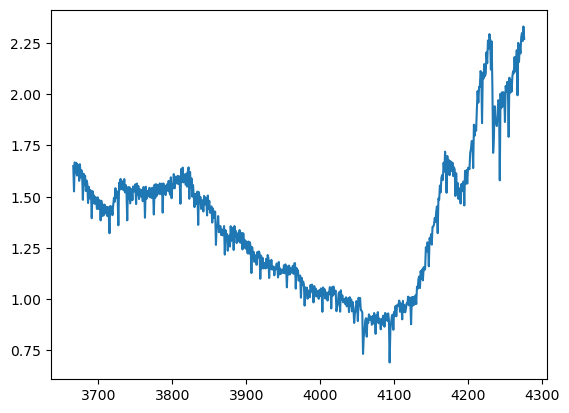

In [35]:
plt.plot(crude_oil_production["Value"])

In [39]:
from statsmodels.tsa.stattools import grangercausalitytests, adfuller

adfuller(crude_oil_production["Value"].pct_change().dropna())

(-5.345829001047518,
 4.397423900828559e-06,
 11,
 598,
 {'1%': -3.4413325959192393,
  '5%': -2.86638530474078,
  '10%': -2.569350430308386},
 -2449.9594893086196)

In [8]:
energy_production["Description"].unique()

array(['Wood Energy Production', 'Biofuels Production',
       'Total Biomass Energy Production',
       'Total Renewable Energy Production', 'Coal Production',
       'Natural Gas (Dry) Production', 'Crude Oil Production',
       'Natural Gas Plant Liquids Production',
       'Total Fossil Fuels Production',
       'Nuclear Electric Power Production',
       'Hydroelectric Power Production', 'Geothermal Energy Production',
       'Solar Energy Production', 'Wind Energy Production',
       'Biomass Energy Production', 'Total Primary Energy Production'],
      dtype=object)

### **Energy Data - Stocks.csv**

In [60]:
# import data

energy_stocks_path = data_folderpath + r"\Energy Data - Stocks.csv"
energy_stocks = pd.read_csv(energy_stocks_path)

energy_stocks.head()

,EIA_ID,YYYYMM,Date,Value,Column_Order,Description,Unit,Energy Type,Energy Category,Energy Class,Sector
0,COSQPUS,197301,1/1/1973,Not Applicable,1,"Crude Oil Stocks, SPR",Million Barrels,Crude Oil - SPR,Crude Oil,Petroleum,NaN
1,COSQPUS,197302,2/1/1973,Not Applicable,1,"Crude Oil Stocks, SPR",Million Barrels,Crude Oil - SPR,Crude Oil,Petroleum,NaN
2,COSQPUS,197303,3/1/1973,Not Applicable,1,"Crude Oil Stocks, SPR",Million Barrels,Crude Oil - SPR,Crude Oil,Petroleum,NaN
3,COSQPUS,197304,4/1/1973,Not Applicable,1,"Crude Oil Stocks, SPR",Million Barrels,Crude Oil - SPR,Crude Oil,Petroleum,NaN
4,COSQPUS,197305,5/1/1973,Not Applicable,1,"Crude Oil Stocks, SPR",Million Barrels,Crude Oil - SPR,Crude Oil,Petroleum,NaN


In [61]:
energy_stocks["Energy Class"].unique()

array(['Petroleum', 'Natural Gas', 'Coal'], dtype=object)

## Monthly Transportation Statistics

**monthly_transportation_statistics.csv**


In [42]:
# import data

monthly_transportation_path = data_folderpath + r"\monthly_transportation_statistics.csv"
monthly_transportation = pd.read_csv(monthly_transportation_path)

monthly_transportation.head()
[col for col in monthly_transportation.columns if "Transborder" in col]

['Transborder - Total North American Freight',
 'Transborder - U.S. - Mexico Freight',
 'Transborder - U.S. - Canada Freight']